# Importing required libraries


In [1]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  

from IPython.display import Image  
import pydotplus

D:\Anaconda\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


## Importing dataset

In [2]:
data_url = "D:\\assignments and books\\Internships\\Sparks\\Iris.csv"
#change the address
iris_df = pd.read_csv(data_url)

print(iris_df.columns)
iris_df['Species'].unique()

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### understanding the data

In [3]:
print(iris_df.info())
iris_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Data convertion into an array

In [4]:
X = iris_df.iloc[:, 1:5] #integer based locator, creates another dataframe
Y = iris_df.iloc[:, 5]
X = np.array(X)
Y = np.array(Y)
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## Splitting Into testing and training data

In [20]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,actual_y=train_test_split(X,Y,test_size=0.30)
print(train_x)
train_y

[[7.2 3.2 6.  1.8]
 [7.1 3.  5.9 2.1]
 [6.  2.2 4.  1. ]
 [6.  2.2 5.  1.5]
 [7.9 3.8 6.4 2. ]
 [6.  2.9 4.5 1.5]
 [5.7 3.  4.2 1.2]
 [5.8 2.8 5.1 2.4]
 [6.7 3.1 5.6 2.4]
 [5.6 3.  4.5 1.5]
 [4.6 3.6 1.  0.2]
 [4.7 3.2 1.3 0.2]
 [5.8 2.7 3.9 1.2]
 [6.4 2.8 5.6 2.1]
 [6.7 3.3 5.7 2.1]
 [5.1 3.4 1.5 0.2]
 [5.1 2.5 3.  1.1]
 [6.9 3.1 5.4 2.1]
 [5.  3.4 1.6 0.4]
 [6.1 2.8 4.  1.3]
 [5.5 2.3 4.  1.3]
 [5.8 2.6 4.  1.2]
 [7.3 2.9 6.3 1.8]
 [5.8 2.7 5.1 1.9]
 [6.8 2.8 4.8 1.4]
 [6.4 2.7 5.3 1.9]
 [6.2 3.4 5.4 2.3]
 [6.6 2.9 4.6 1.3]
 [5.1 3.3 1.7 0.5]
 [5.9 3.  4.2 1.5]
 [5.2 3.4 1.4 0.2]
 [6.5 2.8 4.6 1.5]
 [5.4 3.7 1.5 0.2]
 [5.9 3.2 4.8 1.8]
 [6.2 2.8 4.8 1.8]
 [5.5 4.2 1.4 0.2]
 [6.4 2.9 4.3 1.3]
 [4.8 3.1 1.6 0.2]
 [5.4 3.9 1.7 0.4]
 [7.6 3.  6.6 2.1]
 [5.  3.3 1.4 0.2]
 [6.1 3.  4.6 1.4]
 [6.4 3.2 5.3 2.3]
 [6.8 3.  5.5 2.1]
 [5.  3.5 1.6 0.6]
 [6.3 3.3 6.  2.5]
 [6.7 3.3 5.7 2.5]
 [4.8 3.4 1.9 0.2]
 [7.7 3.  6.1 2.3]
 [6.7 2.5 5.8 1.8]
 [6.5 3.  5.8 2.2]
 [4.6 3.4 1.4 0.3]
 [5.6 2.8 4.

array(['Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virgi

## Creating a tree model

In [21]:
tree = DecisionTreeClassifier(criterion='entropy')
# tree = DecisionTreeClassifier(criterion='entropy',max_depth=4)
tree.fit(train_x, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Creating an image of the model

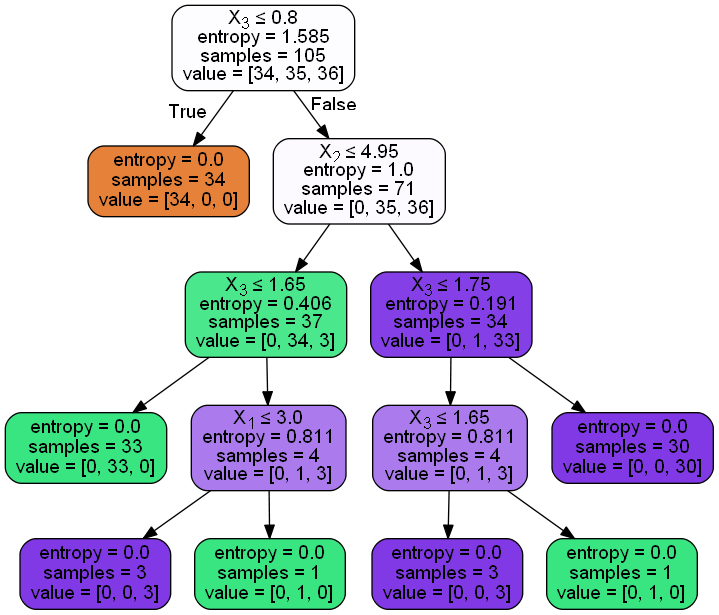

In [22]:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(), width=800, height=300)

## testing the model

In [23]:
predict = tree.predict(test_x)
predict

array(['Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica'], dtype=object)

## finding the accuracy of the predicted data

In [24]:
from sklearn import metrics
print('Accuracy:', metrics.accuracy_score(actual_y, predict))

Accuracy: 0.9777777777777777
